<a href="https://colab.research.google.com/github/egersack/GoogleEarthEngine/blob/master/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
from IPython.display import Image

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=D9an8RawWz1R4As5mE7XMSFwUrEwms48PVtf9w-7AL8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWi2rEagL1k6VkIdVCrLj7vxTheLKJEglNfR16QVsJXzGW-Og6IAVGk

Successfully saved authorization token.


In [33]:
# southern region
temp = ee.ImageCollection("IDAHO_EPSCOR/MACAv2_METDATA")

#specific dates
StartDate = '2018-08-01'
StopDate  = '2018-08-15'

#Filter dates
temp = temp.select('pr').filterDate(StartDate, StopDate)

# Coordinates for Roswell, GA
lat = 34.0232
lon = 84.3616

# Center on Roswell, GA (courthouse)
point = ee.Geometry.Point(lon, lat)

In [35]:
scale = 100
tempsouth = temp.getRegion(point, scale).getInfo()
tempsouth[:30]

[['id', 'longitude', 'latitude', 'time', 'pr'],
 ['BNU-ESM_rcp45_20180801',
  84.36123748930633,
  34.02324222838482,
  1533081600000,
  None],
 ['BNU-ESM_rcp45_20180802',
  84.36123748930633,
  34.02324222838482,
  1533168000000,
  None],
 ['BNU-ESM_rcp45_20180803',
  84.36123748930633,
  34.02324222838482,
  1533254400000,
  None],
 ['BNU-ESM_rcp45_20180804',
  84.36123748930633,
  34.02324222838482,
  1533340800000,
  None],
 ['BNU-ESM_rcp45_20180805',
  84.36123748930633,
  34.02324222838482,
  1533427200000,
  None],
 ['BNU-ESM_rcp45_20180806',
  84.36123748930633,
  34.02324222838482,
  1533513600000,
  None],
 ['BNU-ESM_rcp45_20180807',
  84.36123748930633,
  34.02324222838482,
  1533600000000,
  None],
 ['BNU-ESM_rcp45_20180808',
  84.36123748930633,
  34.02324222838482,
  1533686400000,
  None],
 ['BNU-ESM_rcp45_20180809',
  84.36123748930633,
  34.02324222838482,
  1533772800000,
  None],
 ['BNU-ESM_rcp45_20180810',
  84.36123748930633,
  34.02324222838482,
  1533859200000,
 

In [36]:
#exactly copied from johntango repo
import pandas as pd

def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime',  *list_of_bands]]

    return df

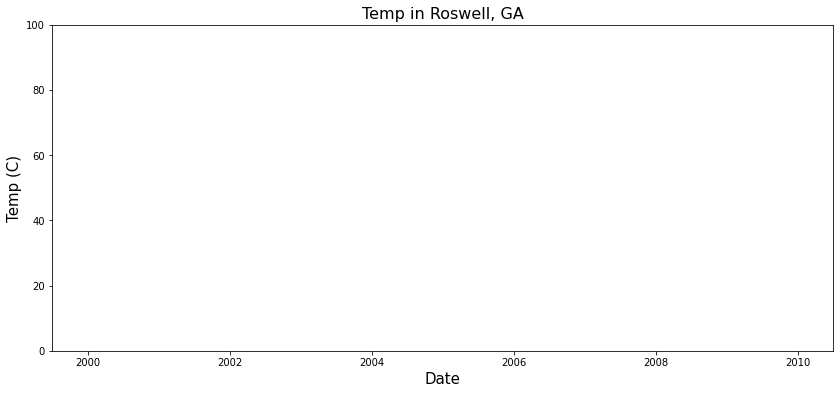

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

temperature = ee_array_to_df(tempsouth,['pr'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(temperature['datetime'], temperature['pr'], c = 'green', alpha = 1)
ax.set_title('Temp in Roswell, GA', fontsize = 16)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Temp (C)', fontsize = 15)
ax.set_ylim(0, 100)
plt.show()


In [47]:
region = point.buffer(1e6)
tempchart = temp.mean()
from IPython.display import Image
url = tempchart.getThumbUrl({
    'min': 290.0, 'max': 314.0, 'dimensions': 2048, 'region': region,
    'palette': ['d8d8d8', '4addff', '5affa3', 'f2ff89', 'ff725c']
})

print(url)
Image(url=url)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dca28228ef3e2de57eccca0930800aa1-3a383b62f184b06945a17ee596b011a6:getPixels
